# Wstep

Jest to wykres ze strony [link](https://fakty.tvn24.pl/fakty-po-poludniu,96/koronawirus-w-polsce-stanislaw-karczewski-poleca-jablka,1034098.html), chociaż pojawia się także pod innymi artykułami na tej domenie. Jako, że wykres aktualizuje się codziennie, postanowiłem go poprawiać z dnia 16.10.2020r, ponieważ tego dnia robiłem drugą pracę domową.

## Oryginalny wykres

![Orginalny wykres](wykres_zrodlowy.jpg)

## Praca domowa nr 2

Link do pracy domowej [link](https://github.com/mini-pw/2021Z-DataVisualizationTechniques/tree/master/homeworks/homework_2/marciniak_piotr)

![Orginalny wykres](moj_wykres.png)

## Moja propozycja

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, drange

covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
#zaladowanie danych

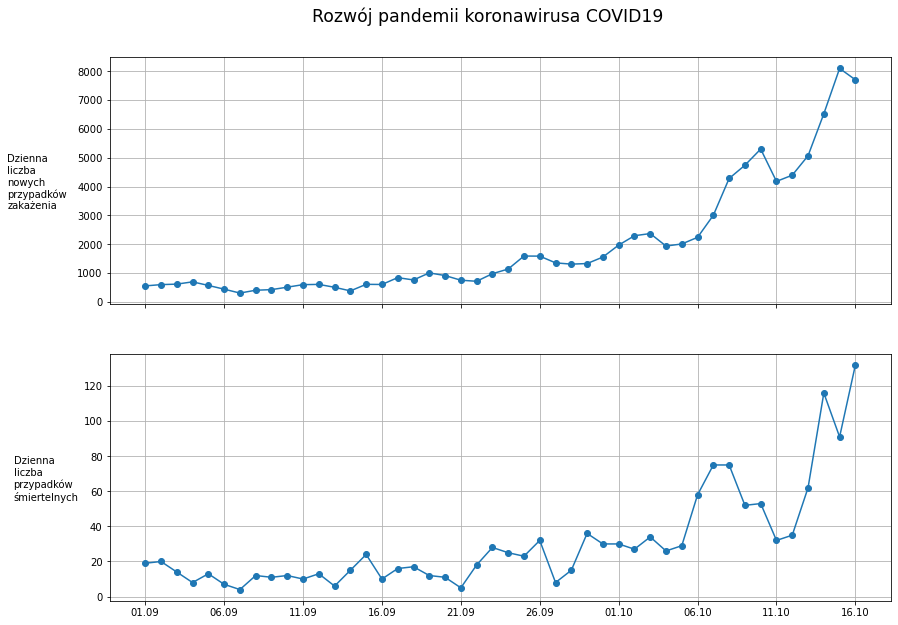

In [2]:
poland = covid.loc[(covid['date'] >= '2020-09-02') & 
                   (covid['date'] <= '2020-10-17') & 
                   (covid['location'] == "Poland"), ['date', 'new_cases', 'new_deaths'] ].reset_index(drop = True)
poland['date'] = pd.date_range(start = '2020-09-01', end = '2020-10-16') 
#dane były przesuniętę o jeden dzień względem orginalnych

#naprawa danych - brak jednych zsumowane kolejnego dnia
poland.loc[(poland['date'] >= '2020-10-04') & 
            (poland['date'] <= '2020-10-05'), ['new_cases']] = 1934, 2006
poland.loc[(poland['date'] >= '2020-10-04') & 
            (poland['date'] <= '2020-10-05'), ['new_deaths']] = 26, 29

#tworzenie wykresu 
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(14, 10)
fig.suptitle("Rozwój pandemii koronawirusa COVID19", 
             size = 'xx-large', y = 0.95)

ax1.plot_date(poland['date'], poland['new_cases'], ls = '-')
ax2.plot_date(poland['date'], poland['new_deaths'], ls = '-')

#tytuły osi
ax1.set_ylabel("Dzienna\nliczba\nnowych\nprzypadków\nzakażenia", 
               labelpad = 70.0,
               rotation = 'horizontal', 
               horizontalalignment = 'left',
               va = 'center_baseline')
ax2.set_ylabel("Dzienna\nliczba\nprzypadków\nśmiertelnych", 
               labelpad = 70.0,
               rotation = 'horizontal', 
               horizontalalignment = 'left',
               va = 'center_baseline')


#ustawienie osi x
ax2.get_xaxis().set_major_formatter(DateFormatter("%d.%m")) 
ax2.get_xaxis().set_ticks(pd.date_range(start = '2020-09-01', end = '2020-10-17', freq ='5D'))
ax1.get_xaxis().set_ticks(pd.date_range(start = '2020-09-01', end = '2020-10-17', freq ='5D'))
ax1.set_xticklabels(labels = ["" for i in range(len(ax1.get_xticklabels()))])

#dodanie siatki
ax1.grid()
ax2.grid()

plt.show()


# Uzasadnienie

Uważam, że ta wizualizacja jest lepsza od źródłowej, ponieważ moim zdaniem
* wykres liniowy jest lepszy do przedstawienia danych, które są ciągłe w czasie niż wykres słupkowy,
* rozbicie danych na dwa wykresy zapewniło nam czytelność, jeśli chodzi o liczbę nowych przypadków śmiertelnych COVID-19, możemy w końcu zobaczyć jakąś tendencję, na orginalnym wykresie dopiero po spojrzeniu na legendę zorientowałem się, o istnieniu drugiego słupka opisujacego tą wielkość,
* dzięki rozbiciu mogłem zastosować jednolitą kolorystykę, co nie odciąga uwagi odbiorcy, a skupia go na danych,
* tytuł orginialnego wykresu wspomina tylko o liczbie nowych zakażeń, a nie wspomina nic o liczbie przypadków śmiertelnych, mój tytuł jest bardziej ogólny,
* interwał na osi x w orginalnym wykresie wynosi dwa dni, ilość tych dat moim zdaniem może być przytłaczająca dla odbiorcy, dlatego zastosowałem interwał tygodniowy.

(nie ukrywam, że powyższą argumentacja moim zdaniem jest dalej trafiona, dlatego została przekopiowana z 2 pracy domowej, można ją pominąć)

Natomiast jest lepsza od mojej poprawionej, ponieważ moim zdaniem
* oczywiście wykres liniowy jest lepszy do przedstawienia danych, które są ciągłe w czasie, ale uważam, że dodanie punktów przypomina nam, że te dane spływają do nas jednego dnia i tego dnia są uwzględniane, poza tym liczba dni w tym wykresie nie jest jakaś duża, przez co te dane nie są, aż tak ciągłe jak mogłyby się wydawać po wykresie liniowym,
* zamiana miejsca osi y na lewą stronę, która wydaję mi się bardziej naturalna w naszej części świata,
* zmiana głównego tytułu na bardziej przejrzysty, nie zawierający niepotrzebnej daty, poza tym powiększenie go, aby przyciągał bardziej uwagę,
* usunięcie podpisów osi na wykresie górnym, ponieważ są one takie same jak na dolnym zwiększa moim zdaniem przejrzystość,
* zmiana koloru linii na niebieski, który uważam za bardziej spokojny niż pomarańczowy, który moim zdaniem jest bardziej energiczny,
* dodanie większej ilości etykiet na osi x powoduje łatwiejsze odczytanie danych, poza tym interwał 5 dni idealnie wpisuje się w podane dane.

### Zdanie komentarza
Trochę mam wrażenie, że tylko zamieszałem jeszcze raz zupą, zamiast stworzyć coś innego.